# Final Exam - Open

## FINM 36700 - 2024

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

***

# Instructions

## Please note the following:

Points
* The exam is `85` points.
* You have `85` minutes to complete the exam.
* For every minute late you submit the exam, you will lose one point.


Submission
* You will upload your solution to the `Final - Open` assignment on Canvas, where you downloaded this. 
* Be sure to **submit** on Canvas, not just **save** on Canvas.
* Your submission should be readable, (the graders can understand your answers.)
* Your submission should **include all code used in your analysis in a file format that the code can be executed.** 

Rules
* The exam is open-material, closed-communication.
* You do not need to cite material from the course github repo - you are welcome to use the code posted there without citation.

Advice
* If you find any question to be unclear, state your interpretation and proceed. We will only answer questions of interpretation if there is a typo, error, etc.
* The exam will be graded for partial credit.

## Data

**All data files are found in the class github repo, in the `data` folder.**

- For Section 1:
    * `data/final_exam_data.xlsx`
- for Section 2:
    * `data/fx_rf_data.xlsx`

## Scoring

| Problem | Points |
|---------|--------|
| 1       | 40     |
| 2       | 45     |

### Each numbered question is worth 5 points unless otherwise specified.

***

In [1]:
import os
import sys
import pandas as pd
from scipy.stats import norm, chi2
import statsmodels.api as sm
import numpy as np
from functools import partial
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
grandparent_dir = os.path.abspath(os.path.join(parent_dir, os.pardir))
sys.path.insert(0, parent_dir)
sys.path.insert(0, grandparent_dir)
import cmds.portfolio_management_helper as pmh

plt.style.use("seaborn-v0_8-whitegrid")
PLOT_WIDTH, PLOT_HEIGHT = 8, 5
COLORS = ["blue", "red", "orange"]

warnings.filterwarnings('ignore')
pd.options.display.float_format = "{:.4f}".format
p = plt.rcParams

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
DATA_PATH = parent_dir + '/data/'
FILE_NAME = DATA_PATH + 'final_exam_data.xlsx'
assets = pmh.read_excel_default(FILE_NAME, 
                                 sheet_name='Asset Returns',
                                 index_col='Date', parse_dates=True)
factors = pmh.read_excel_default(FILE_NAME, 
                                 sheet_name='Factor Returns',
                                 index_col='Date', parse_dates=True)
betas = pmh.read_excel_default(FILE_NAME, 
                                 sheet_name='Asset Betas',
                                 index_col='Ticker', parse_dates=True)

# 1. Cross-Sectional Factor Pricing

Use the data found in the file `final_data.xlsx`. The sheet named `Asset Returns` contains daily excess returns data for various assets; the sheet named `Factor Returns` contains daily excess returns data for some unknown factor; and the sheet named `Asset Betas` contains the betas of each asset with respect to the given factor.

Consider the data to have an annualization factor of `252` days per year.

### 1.
(10pts)

Using linear regression, estimate the factor risk premium for __each point in time__, using the following model: $\phantom{Brian Hood}$ 

$$
\tilde{r}^{(i)}_t = \beta^{(i)}\lambda_t + \epsilon^{(i)}_t
$$

Using your estimated series $\lambda_t$, report...

* the last 3 values. 

* the annualized mean.

* the annualized vol.

In [3]:
models, lmbdas = {}, pd.DataFrame(index=assets.index)
for i, date in enumerate(assets.index):
    model_t = sm.OLS(assets.iloc[i], betas).fit()
    models[date] = model_t
    lmbda = model_t.params[0]
    lmbdas.loc[date, 'Lambda'] = lmbda

In [4]:
# Last 3 values
lmbdas.iloc[-3:]

,Lambda
date,
2024-11-06,0.0230
2024-11-07,0.0011
2024-11-08,0.0018


In [5]:
# Annualized Mean and Vol
pmh.calc_summary_statistics(lmbdas, annual_factor=252, keep_columns=['Annualized'], drop_columns=['Sharpe', 'VaR']).style.format("{:.2%}")

Assuming excess returns were provided to calculate Sharpe. If returns were provided (steady of excess returns), the column "Sharpe" is actually "Mean/Volatility"


,Annualized Mean,Annualized Vol
Lambda,17.55%,11.69%


### 2.

(10pts)

Compare $\lambda_t$ to the realized factor returns, $\tilde{f}_t$.

* Plot the cumulative (excess) returns of $\lambda_t$ and $\tilde{f}_t$.
* Report the correlation between these two series.
* Report the serial correlation of each series.

Should we expect the serial correlation of $\tilde{f}$ to be near zero? What about $\lambda_t$?

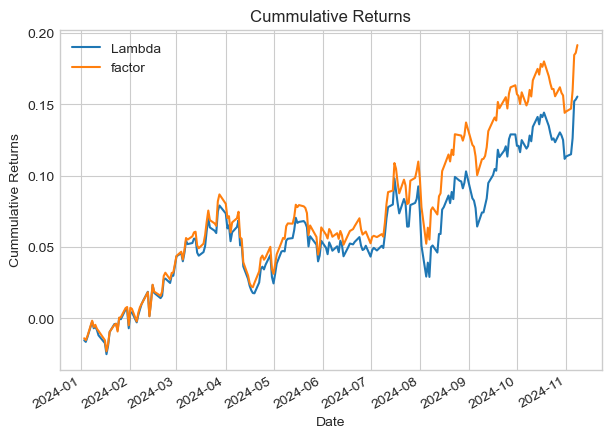

In [6]:
compare = pd.concat([lmbdas, factors], axis=1)
pmh.calc_cummulative_returns(compare)

The highest correlation (98.51%) is between factor and Lambda
The lowest correlation (98.51%) is between Lambda and factor


<Axes: >

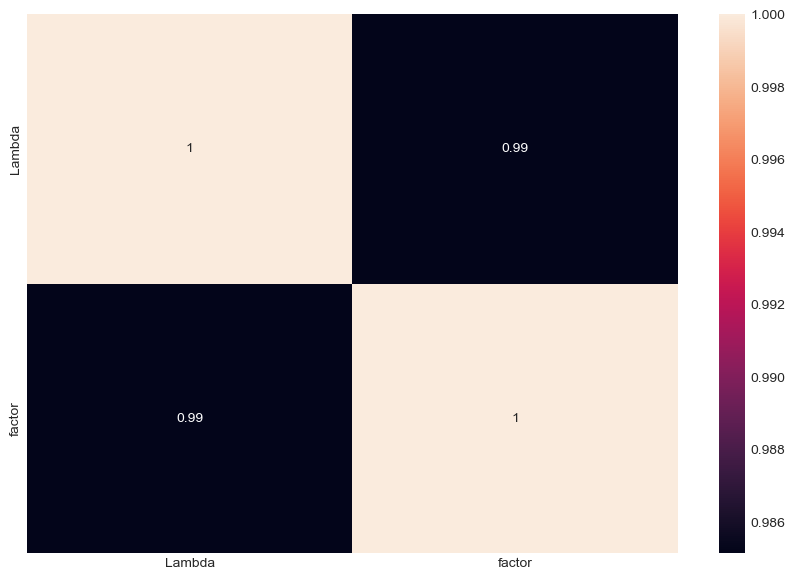

In [7]:
pmh.calc_correlations(compare)

In [8]:
for series in compare.columns:
    print(f'Serial correlation of {series}: {compare[series].autocorr():.2%}')

Serial correlation of Lambda: 0.16%
Serial correlation of factor: 1.84%


### 3.

We estimated our factor premium in a regression that excluded an intercept term. Why might we have done this? In what circumstance would we prefer to include an intercept term?

<span style="color:red;">

We might have decided to estimate our factor premium in a regression that excluded an intercept term because we believe the level of the returns (i.e: the $\alpha$) is well estimated. Consequently, we want our regression to capture that level in each of our factor premium estimates.

We would prefer to include an intercept term when we don't believe that $\alpha$ is well estimated. This is often a consideration when we are constructing replicating portfolios or hedging positions where we may be more concerned with capturing variance.

</span>

### 4.

(10pts)

Now, use the actual factor returns, $\tilde{f}_t$ to analyze the fit of this pricing model using a __single__ cross-sectional regression to estimate  $\phantom{Brian Hood}$

$$
E[r^{(i)}] = \eta + \beta^{(i)} E[\tilde{f}] + \epsilon^{(i)}
$$

How well does this factor work for pricing? Provide supporting evidence for your answer.

In [ ]:
# Corrected, but still very unsure about it
exp_factor_ret = factors.mean()[0] * np.ones(len(assets.columns))
exp_factor_ret = pd.DataFrame(exp_factor_ret, index=assets.columns, columns=['Factor Return'])

exp_rets = assets.mean().to_frame('Expected Returns')
factor = sm.add_constant(exp_factor_ret)
model = sm.OLS(exp_rets, factor).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Expected Returns   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 09 Dec 2024   Prob (F-statistic):                nan
Time:                        22:47:43   Log-Likelihood:                 2657.0
No. Observations:                 498   AIC:                            -5312.
Df Residuals:                     497   BIC:                            -5308.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Factor Return     1.0000      0.062     16.026      0.000       0.877       1.123
==============================================================================
Omnibus:                       44.117   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              214.274
Skew:                          -0.124   Prob(JB):                     2.96e-47
Kurtosis:                       6.204   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Checking out of curiosity
print(f'CS MAE: {model.resid.abs().mean():.4%}')

CS MAE: 0.0848%


<span style="color:red;">

This factor model does fairly poor job of pricing. This is evidenced by the very small $R^2$ in this cross-section regression above, and the $\lambda \approx 0$. (Note: in the table above, $\lambda$ represents the $\beta$ described in the )

</span>

### 5.

The factor we've used, $\tilde{f}$ is actually the **equally**-weighted portfolio of equities. Suppose the CAPM holds exactly, with the **value**-weighted market equity portfolio. In that case, what would we expect, theoretically, from the previous section?

<span style="color:red;">

We would not expect the results to mirror what we expect for CAPM. This is because the market factor that we are using would inherently not reflect the choices of mean-variance investors in the market, which is a critical underlying assumption in CAPM. Consequently, this factor model would not fit the expected returns of the assets perfectly, as the market factor in CAPM would.

</span>

***

# 2. Currency Trades

For this question, use the data set from `data/fx_rf_data.xlsx`.

Calculate the **arithmetic** (not log) excess return to holding each foreign currency.

Data Note:
* Consider the risk-free rate data as being quoted as an annualized value, where this annualization is a scaling of `252`.

Throughout this problem, we only consider returns generated between `Jan 2018` and `Aug 2024`.

In [31]:
FILE_NAME = DATA_PATH + 'fx_rf_data.xlsx'
START_DATE = '2018-01'
END_DATE = '2024-08'
rates = pmh.read_excel_default(FILE_NAME, 
                                 sheet_name='risk-free rates',
                                 index_col='date', parse_dates=True)
rates /= 252
fx = pmh.read_excel_default(FILE_NAME, 
                                 sheet_name='exchange rates',
                                 index_col='date', parse_dates=True)

### 1.

Report the first and final three values of each of these excess return series.

In [38]:
# Corrected - Percent Change for Spot rates and Rate Ratio for Interest Rates
forex = fx.loc[START_DATE:END_DATE].pct_change().shift(-1)
rate_diffs = (1 + rates.loc[START_DATE:END_DATE, ['USD']].values) / (1 + rates.loc[START_DATE:END_DATE].drop('USD', axis=1)) - 1
xs_rets = (forex - rate_diffs).dropna()

In [39]:
display(xs_rets.head(3))
display(xs_rets.tail(3))

,JPY,EUR,GBP,MXN,CHF
date,,,,,
2018-01-01,0.0033,0.0038,0.0064,0.0061,0.0032
2018-01-02,-0.0021,-0.0037,-0.0055,0.0098,-0.0054
2018-01-03,-0.0022,0.0043,0.0026,0.0033,0.0023


,JPY,EUR,GBP,MXN,CHF
date,,,,,
2024-08-27,-0.0045,-0.0058,-0.0053,0.0061,-0.0008
2024-08-28,-0.0030,-0.0039,-0.0018,-0.0102,-0.0062
2024-08-29,-0.0083,-0.0027,-0.0031,0.0064,-0.0028


### 2.

Report the following performance metrics. Annualize the mean and volatility using an assumption of `252` days per year.

* mean
* volatility
* skewness
* (excess) kurtosis
* max drawdown

Also report the correlation matrix.

In [16]:
pmh.calc_summary_statistics(xs_rets, annual_factor=252, keep_columns=['Annualized', 'Skew', 'Kurtosis', 'Drawdown'], drop_columns=['Sharpe', 'VaR']).style.format("{:.2%}")

Assuming excess returns were provided to calculate Sharpe. If returns were provided (steady of excess returns), the column "Sharpe" is actually "Mean/Volatility"


,Annualized Mean,Annualized Vol,Skewness,Excess Kurtosis,Max Drawdown
JPY,-5.68%,8.47%,52.13%,652.62%,-43.97%
EUR,-2.61%,7.06%,3.38%,148.52%,-28.95%
GBP,-0.57%,8.91%,-10.02%,386.53%,-27.55%
MXN,6.24%,12.50%,-48.75%,299.29%,-26.44%
CHF,-0.14%,7.16%,33.46%,236.20%,-16.84%


### 3.

As of `Dec 2017`, which of these currency trades has the most **carry**? 

Does this indicate high or low reeturns, assuming UIP?

In [50]:
# Corrected - Percent Change for Spot rates and Rate Ratio for Interest Rates
# Annualized Carry in Dec 2017
forex_2017 = fx.loc['2017-12':'2017-12'].pct_change().shift(-1)
rate_diffs_2017 = (1 + rates.loc['2017-12':'2017-12', ['USD']].values) / (1 + rates.loc['2017-12':'2017-12'].drop('USD', axis=1)) - 1
xs_rets_2017 = (forex_2017 - rate_diffs_2017).dropna()
(xs_rets_2017 * 252).iloc[-1]

JPY   0.3836
EUR   1.2896
GBP   1.3037
MXN   0.7041
CHF   1.0130
Name: 2017-12-28 00:00:00, dtype: float64

<span style="color:red;">

The currency trade that has the most carry is the MXN carry trade. This indicates high returns, assuming UIP, because UIP assumes there should no returns realized from carry trades. That is, UIP assumes
$$s_{t+1} - s_t = r_{t, t+1}^{f, \$} - r_{t, t+1}^{f, i}$$

</span>

### 4.

Calculate an **average currency factor** which is the equal-weighted average of the currency return series already calculated. Call this factor, $Z$.

Estimate the Linear Factor Decomposition of each of the currency trades on this factor, $\tilde{r}^z_t$. Report,
* annualized alphas
* betas
* r-squared values

In [51]:
z = xs_rets.mean(axis=1).to_frame('Avg Currency Factor')
pmh.calc_iterative_regression(xs_rets, z, annual_factor=252, keep_columns=['Annualized', 'Beta', 'R-Squared'], 
                              drop_columns=['Ratio', 'Tracking', 'Fitted']).T

"calc_regression" assumes excess returns to calculate Information and Treynor Ratios


,JPY,EUR,GBP,MXN,CHF
Annualized Alpha,-0.0522,-0.0209,0.0005,0.0693,0.0034
R-Squared,0.3891,0.6958,0.6397,0.4009,0.5941
Avg Currency Factor Beta,0.8328,0.9279,1.1226,1.2474,0.8692


### 5.

Do your estimates seem in line with a factor pricing model for these trades where $\tilde{r}^z$ is the single factor? 

Explain your conclusion. Don't worry about small sample sizes.

<span style="color:red;">

No, my estimates seem quite a bit stronger than a factor pricing model for these trades. In factor pricing models, we generally don't expect very high R-Squared values in the time series regressions. Instead, we expect the high R-Squared values to show up in the cross section regression. Additionally, the $\alpha$'s in the regressions for JPY and MXN are meaningfully different from 0, which suggests that these aren't particularly strong factor pricing models. 

</span>

### 6. 

From the performance metrics of these currency trades, 
* Do you expect diversification is particularly useful or not? Be specific.
* Do you expect mean-variance optimization will do relatively well out of sample? Be specific.

The highest correlation (75.20%) is between EUR and CHF
The lowest correlation (7.71%) is between JPY and MXN


<Axes: >

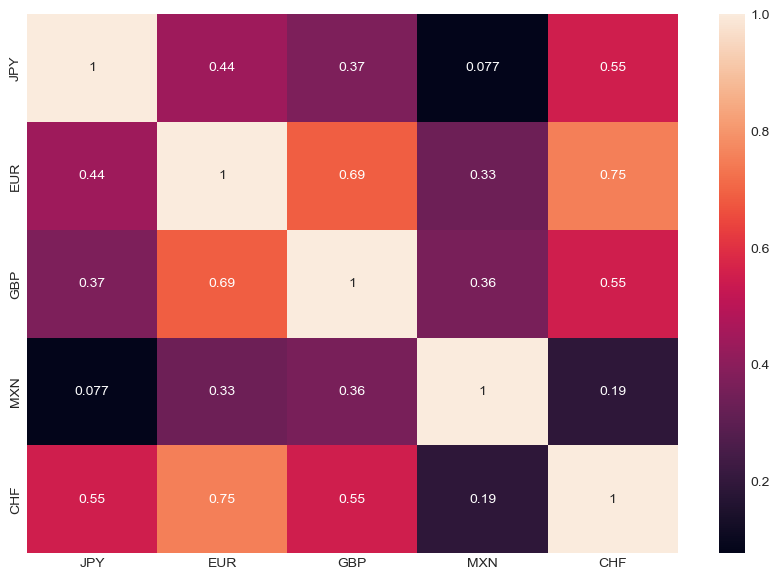

In [52]:
pmh.calc_correlations(xs_rets)

<span style="color:red;">

Based on the correlations in the above graphic, it appears there is a good amount of diversification that can be realized from a portfolio of these carry trades. However, this does not mean that MVO will do particularly well out of sample, especially since some of the assets are fairly highly correlated (EUR-CHF and EUR-GBP). These high correlations will lead to an ill-conditioned covariance matrix that will be difficult to invert for the mean-variance optimization and lead to poor performance of the portfolio OOS.

</span>

### 7.

Calculate the tangency weights for a portfolio of these currency trades. 

Report the performance metrics of `2.2` for this tangency portfolio.

In [53]:
curr_tan_wts = pmh.calc_tangency_weights(xs_rets)
mvo_pfa = pmh.create_portfolio(xs_rets, curr_tan_wts.iloc[:, 0].to_dict(), port_name='MVO Portfolio')
pmh.calc_summary_statistics(mvo_pfa, annual_factor=252, keep_columns=['Annualized', 'Skew', 'Kurtosis', 'Drawdown'], 
                            drop_columns=['Sharpe', 'VaR']).T.style.format("{:.2%}")

Assuming excess returns were provided to calculate Sharpe. If returns were provided (steady of excess returns), the column "Sharpe" is actually "Mean/Volatility"


,MVO Portfolio
Annualized Mean,-33.70%
Annualized Vol,29.08%
Skewness,67.65%
Excess Kurtosis,381.52%
Max Drawdown,-94.77%


### 8.

Suppose you are a USD-based investor, but you want to short `1 JPY`, and use it to go long the equivalent amount of USD.

Calculate the excess return to this short-yen (SY) trade, denoted $\tilde{r}_{t+1}^{SY}$.

We're still examining `January 2018` through `August 2024`.

Report the first and last three values of the timeseries of excess returns.

In [ ]:
# Corrected - Shorting the JPY Trade should just be the spot holding return multiplied by JPY risk-free rate factor
forex = fx.loc[START_DATE:END_DATE, ['JPY']].pct_change().shift(-1)
short_jpy_trade = -(forex * (1 + rates.loc[START_DATE:END_DATE, ['JPY']].values)).dropna()

In [60]:
display(short_jpy_trade.head(3))
display(short_jpy_trade.tail(3))

,JPY
date,
2018-01-01,-0.0034
2018-01-02,0.0020
2018-01-03,0.0021


,JPY
date,
2024-08-27,0.0043
2024-08-28,0.0027
2024-08-29,0.0081


### 9.

Report the performance statistics requested in `2.2` for this short-yen trade. 

Also, what date is the min and max return for this trade?

In [61]:
summary_stats = pmh.calc_summary_statistics(short_jpy_trade, annual_factor=252,
                            keep_columns=['Annualized', 'Drawdown', 'Peak', 'Bottom', 'Min', 'Max']).T
summary_stats

Assuming excess returns were provided to calculate Sharpe. If returns were provided (steady of excess returns), the column "Sharpe" is actually "Mean/Volatility"


,JPY
Annualized Mean,0.0342
Annualized Vol,0.0848
Annualized Sharpe,0.4030
Min,-0.0393
Max,0.0309
Annualized Historical VaR (5.00%),-0.1302
Annualized Historical CVaR (5.00%),-0.2080
Max Drawdown,-0.1550
Peak,2022-10-19 00:00:00
Bottom,2023-01-12 00:00:00


***